In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex': True,
                     'text.latex.preamble': r'\usepackage{amsmath}'})

import numpy as np
import pandas as pd
import uproot4 as up

from nicks_plot_utils import Hist2D, Hist1D

from lmfit.models import Model
import matplotlib.gridspec as gridspec

In [2]:
print(plt.rcParams['axes.prop_cycle'].by_key()['color'])

COLOR_BLUE=plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
COLOR_RED=plt.rcParams['axes.prop_cycle'].by_key()['color'][1]
COLOR_DGREEN=plt.rcParams['axes.prop_cycle'].by_key()['color'][3]


['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']


In [3]:
wvsq2 = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/WvsQ2_hist")
w = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/W")

wvsq2.to_boost()

Histogram(
  Regular(500, 0, 3.25),
  Regular(500, 0, 5),
  storage=Double()) # Sum: 11241851.0 (11251148.0 with flow)

In [4]:
hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")

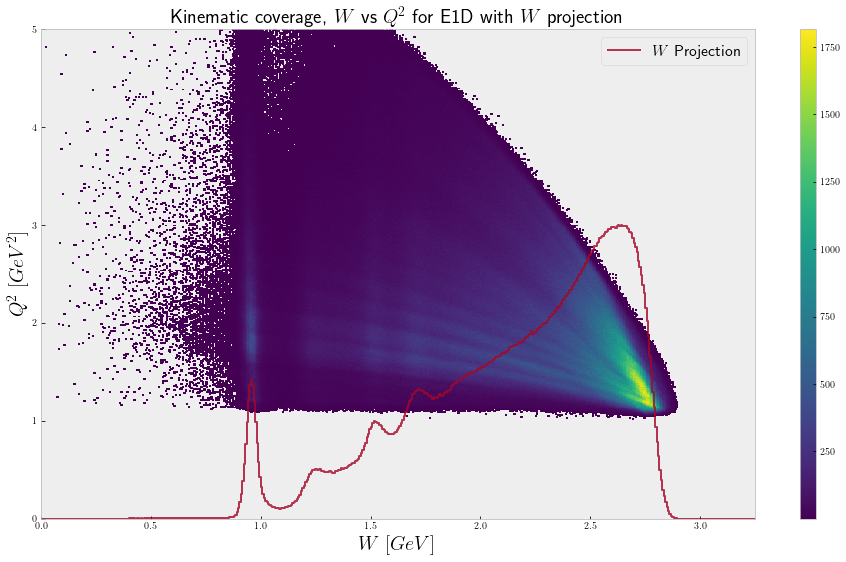

In [5]:
#hist_W.histogram(density=True, factor=3.0)
hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, alpha=0.8, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $W$ vs $Q^2$ for E1D with $W$ projection")

plt.show()

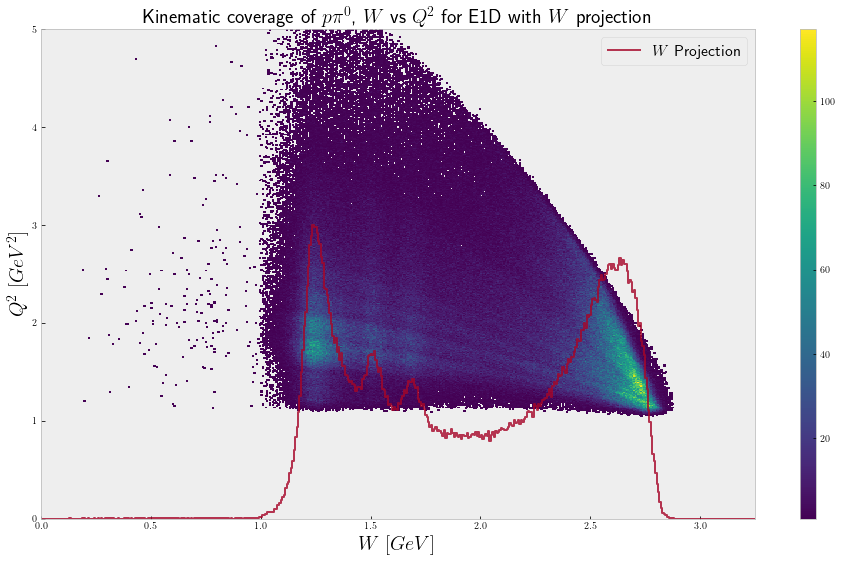

In [158]:
wvsq2 = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/WvsQ2_Ppi0")
w = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/W_Ppi0")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")

hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage of $p\pi^{0}$, $W$ vs $Q^2$ for E1D with $W$ projection")

# plt.xlim(left=1.0, right=2.0)

plt.show()

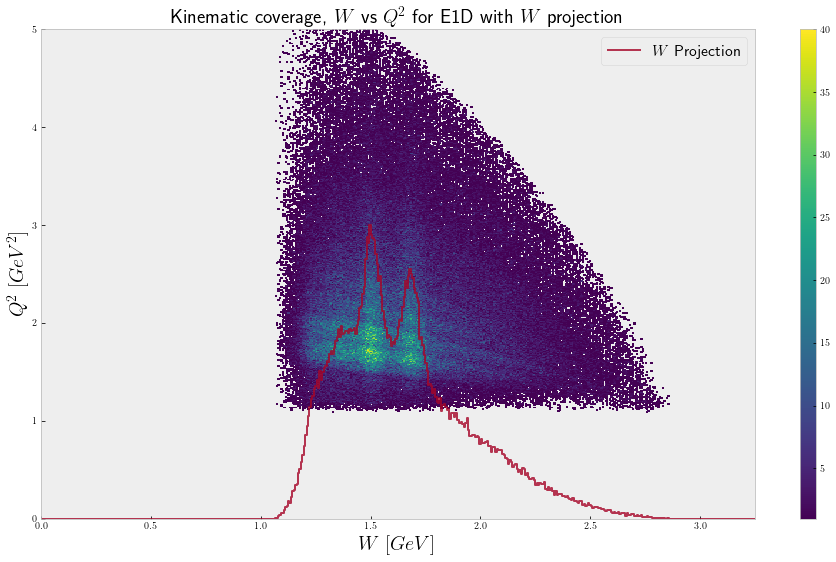

In [156]:
wvsq2 = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/WvsQ2_channel")
w = up.open("/Users/tylern/Desktop/show/today.root:W vs Q2/W_channel")

hist = Hist2D(boost_hist=wvsq2.to_boost(), xname="$W~[GeV]$", yname="$Q^2~[GeV^2]$")
hist_W = Hist1D(boost_hist=w.to_boost(), name="$W~[GeV]$")


hist_W.histogram(label="$W$ Projection", density=True, factor=3.0, filled=False, color=COLOR_RED)
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $W$ vs $Q^2$ for E1D with $W$ projection")

#plt.xlim(left=1.0, right=2.0)

plt.show()

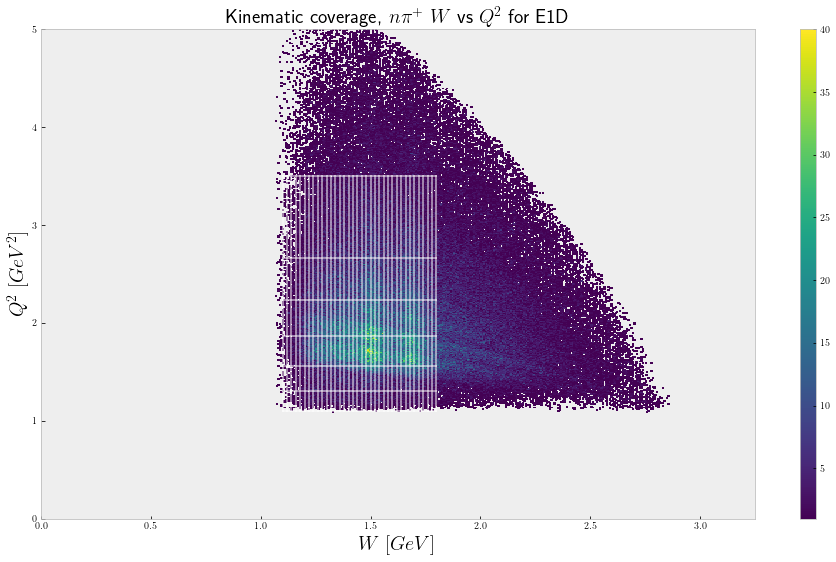

In [8]:
hist.plot(colorbar=True, density=False, zeros=False)
plt.title("Kinematic coverage, $n\pi^{+}$ $W$ vs $Q^2$ for E1D")

w_bins = np.array([1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3,
                   1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52,
                   1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74,
                   1.76, 1.78, 1.8])

q2_bins = np.array([1.1, 1.30, 1.56, 1.87, 2.23, 2.66, 3.5])


for q2 in q2_bins:
    plt.axhline(q2, c='w', alpha=0.5, xmin=(1.1/3.25), xmax=(1.8/3.25))

for w in w_bins:
    plt.axvline(w, c='w', alpha=0.5, ymin=(1.1/5.0), ymax=(3.5/5.0))


plt.show()

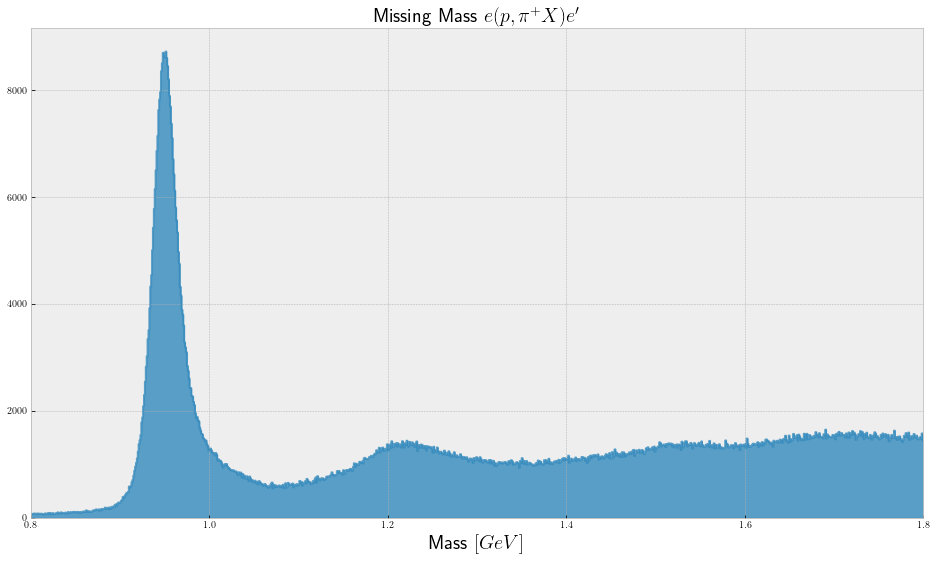

In [27]:
mm = up.open("/Users/tylern/Desktop/show/today.root:Missing_Mass/Missing_Mass_small")
hist_mm = Hist1D(boost_hist=mm.to_boost(), name="Mass$~[GeV]$")
#hist_mm.histogram(density=False, filled=False, alpha=0.6)
hist_mm.histogram(density=False, filled=True, alpha=0.8)
plt.title("Missing Mass $e ( p, \pi^{+} X ) e^{\prime}$")
plt.ylim(bottom=0)
plt.xlim(left=0.8, right=1.8)
plt.show()

a 4.1581e-01 b -1.5604e-02 c 1.8020e-05
a 8.5775e-02 b 4.6974e-02 c -4.4377e-05


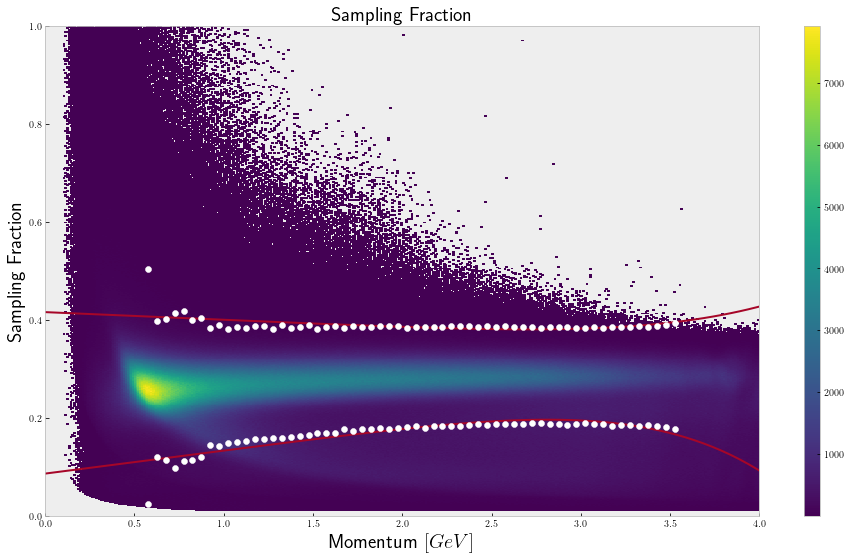

In [23]:
par_top = [0.368209, 0.000961273, 4.8e-07]
par_bot = [0.162189, 0.0134756, -2e-05]
xs = np.linspace(0,5,100)

def ec_fit(x, a, b, c):
    return a + b * x + c * x * x * x * x * x * x

sf = up.open("/Users/tylern/Desktop/show/today.root:EC_hists/EC_sampling_fraction")

for top_bot in ["/Users/tylern/Desktop/show/today.root:EC_hists/Positive_EC_graph", "/Users/tylern/Desktop/show/today.root:EC_hists/Negative_EC_graph"]:
    sf_top = up.open(top_bot)
    X = sf_top.tojson()['fX'][5:65]
    Y = sf_top.tojson()['fY'][5:65]

    model = Model(ec_fit)
    parms = model.make_params(a=par_bot[0], b=par_bot[1], c=par_bot[2])
    

    result = model.fit(Y, parms, x=X)
    plt.plot(xs, model.eval(result.params, x=xs), c=COLOR_RED)

    plt.scatter(X, Y, c='w', zorder=4)
    print(f"a {result.params['a'].value:0.4e} b {result.params['b'].value:0.4e} c {result.params['c'].value:0.4e}" )

hist_mm = Hist2D(boost_hist=sf.to_boost(), name="Mass$~[GeV]$")
hist_mm.plot(zeros=False, density=False)

plt.ylim(bottom=0, top=1.0)
plt.xlim(left=0, right=4.0)

plt.title("Sampling Fraction")
plt.xlabel("Momentum $[GeV]$")
plt.ylabel("Sampling Fraction")

plt.show()



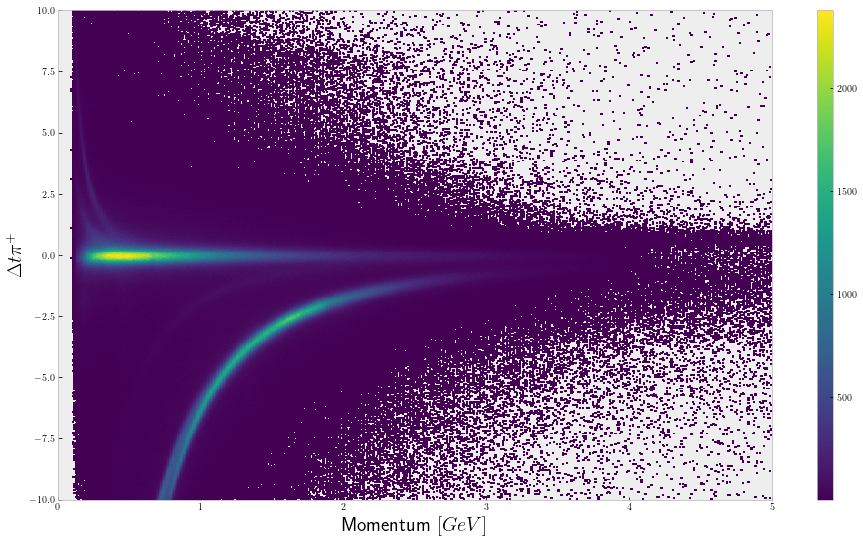

In [11]:
dt_pip = up.open("/Users/tylern/Desktop/show/today.root:Delta_T/delta_t_mass_PIP")
hist_dt = Hist2D(boost_hist=dt_pip.to_boost(), name="Momentum$~[GeV]$")
hist_dt.plot(zeros=False, density=False)


plt.title("")
plt.xlabel("Momentum $[GeV]$")
plt.ylabel("$\Delta t \pi^{+}$")

plt.show()

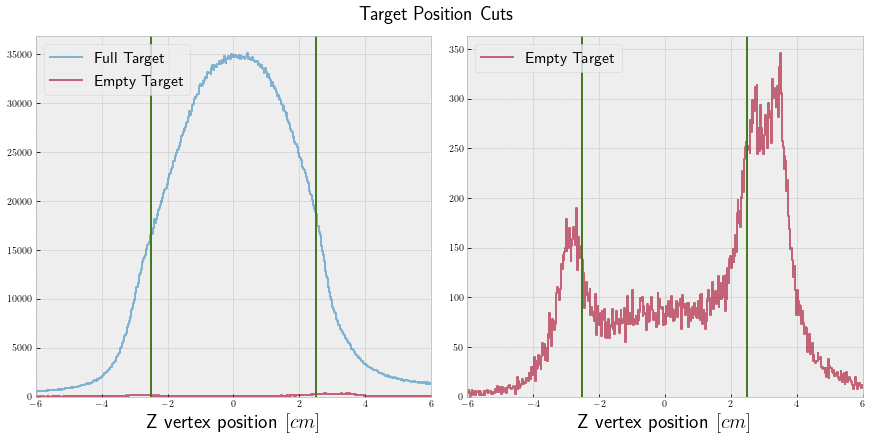

In [13]:
left=-2.5
right=2.5

fig = plt.figure(constrained_layout=True, figsize=[12,6])
spec = gridspec.GridSpec(ncols=2, nrows=1, figure=fig, wspace=0.1, hspace=0.1)
ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1], sharex=ax1)


for EF in ['Full','Empty']:
    vz = up.open(f"/Users/tylern/Desktop/show/{EF}.root:Beam Position/Target_vertex_Z")
    hist_vz = Hist1D(boost_hist=vz.to_boost(), name="Z vertex position $[cm]$")
    hist_vz.histogram(density=False, filled=False, alpha=0.6, label=f'{EF} Target', ax=ax1, loc='upper left')
    ax1.axvline(left, c=COLOR_DGREEN)
    ax1.axvline(right, c=COLOR_DGREEN)

    
vz = up.open(f"/Users/tylern/Desktop/show/Empty.root:Beam Position/Target_vertex_Z")
hist_vz = Hist1D(boost_hist=vz.to_boost(), name="Z vertex position $[cm]$")
hist_vz.histogram(density=False, filled=False, alpha=0.6, label=f'Empty Target', color=COLOR_RED, ax=ax2, loc='upper left')
ax2.axvline(left, c=COLOR_DGREEN)
ax2.axvline(right, c=COLOR_DGREEN)

ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)
ax1.set_xlim(left=-6, right=6)
plt.suptitle("Target Position Cuts")
plt.show()

0.5820524877519601
-0.5286837506819292


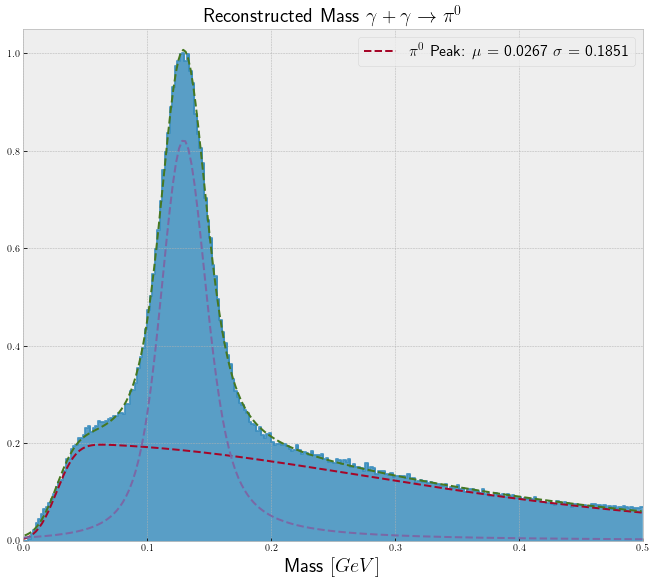

In [149]:
from lmfit.models import GaussianModel, SkewedVoigtModel


fig = plt.figure(constrained_layout=True, figsize=[9, 8])

mmpi0 = up.open("/Users/tylern/Desktop/show/Full.root:Missing_Mass/Mass_pi0")
hist_mmpi0 = Hist1D(boost_hist=mmpi0.to_boost(), name="Mass$~[GeV]$")
hist_mmpi0.histogram(density=True, filled=True, alpha=0.8)
plt.title(r"Reconstructed Mass $\gamma + \gamma \rightarrow \pi^{0}$")
plt.ylim(bottom=0)
plt.xlim(left=0, right=0.5)


y, x = mmpi0.to_numpy()
x = (x[1:] + x[:-1]) / 2
y = y/np.max(y)


gauss1 = SkewedVoigtModel(prefix='g1_')
pars = gauss1.guess(y, x=x)
pars.update(gauss1.make_params())

gauss2 = SkewedVoigtModel(prefix='g2_')
pars.update(gauss2.make_params())

mod = gauss1 + gauss2
xs=np.linspace(0,0.5,200)
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

comps = out.eval_components(x=xs)

plt.plot(xs, comps['g1_'], '--', label=f"$\pi^{0}$ Peak: $\mu$ = {out.params['g1_center'].value:0.4f} $\sigma$ = {out.params['g1_sigma'].value:0.4f}")
plt.plot(xs, comps['g2_'], '--')
plt.plot(x, out.best_fit, '--')
plt.legend(loc='upper right')

plt.axvline(out.params['g1_center']+3*out.params['g1_sigma'], c=COLOR_RED)
plt.axvline(out.params['g1_center']-3*out.params['g1_sigma'], c=COLOR_RED)

print(out.params['g1_center']+3*out.params['g1_sigma'])
print(out.params['g1_center']-3*out.params['g1_sigma'])



plt.show()

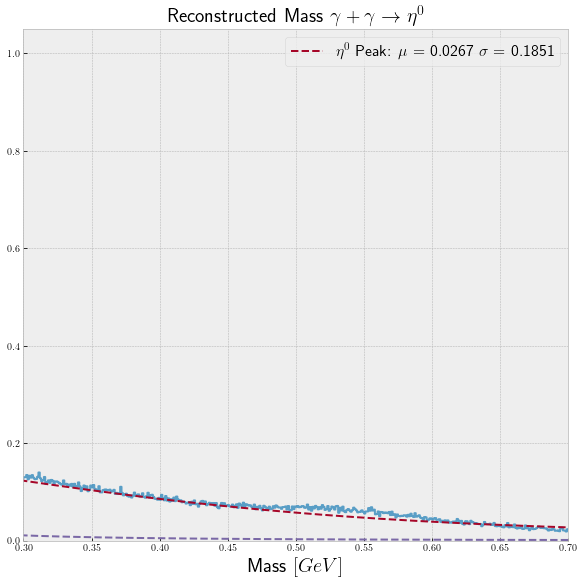

In [154]:
fig = plt.figure(constrained_layout=True, figsize=[8, 8])

mmeta = up.open("/Users/tylern/Desktop/show/Full.root:Missing_Mass/Mass_eta")
hist_mmeta = Hist1D(boost_hist=mmeta.to_boost(), name="Mass$~[GeV]$")
hist_mmeta.histogram(density=True, filled=False, alpha=0.8)
plt.title(r"Reconstructed Mass $\gamma + \gamma \rightarrow \eta^{0}$")
plt.ylim(bottom=0)
plt.xlim(left=0, right=1.0)


y, x = mmeta.to_numpy()
x = (x[1:] + x[:-1]) / 2
y = y/np.max(y)

gauss3 = SkewedVoigtModel(prefix='g3_')
pars.update(gauss3.make_params())
pars['g3_center'].set(value=0.55, min=0.4,max=0.6)

mod2 = gauss1 + gauss2 + gauss3
xs=np.linspace(0, 1.0, 200)

comps = out.eval_components(x=xs)

plt.plot(xs, comps['g1_'], '--', label=f"$\eta^{0}$ Peak: $\mu$ = {out.params['g1_center'].value:0.4f} $\sigma$ = {out.params['g1_sigma'].value:0.4f}")
plt.plot(xs, comps['g2_'], '--')
#plt.plot(x, out.best_fit, '--')
plt.legend(loc='upper right')
plt.xlim(0.3,0.7)

plt.show()